<a href="https://colab.research.google.com/github/Anastas1aMakarova/Machine-Learning/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Логическая регрессия "Flipkart Reviews"
https://www.kaggle.com/datasets/divanshu22/flipkart-reviews

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

sns.set()
plt.rcParams["figure.figsize"] = (12, 8)

**Загрузка данных**

In [ ]:
df = pd.read_csv('flipkart_reviews.csv', sep=',')
df = (df[["Rating", "Review"]])
df=df.rename(columns={"Rating": "Rating","Review":"Review"})
df.head()

,Rating,Review
0,5,Best under 60k Great performanceI got it for a...
1,5,Good perfomence...
2,5,Great performance but usually it has also that...
3,5,My wife is so happy and best product 👌🏻😘
4,5,"Light weight laptop with new amazing features,..."


In [ ]:
df = df.replace(np.NaN, "")

In [ ]:
df['Rating'].value_counts()

5    1382
4     552
1     184
3     140
2      46
Name: Rating, dtype: int64

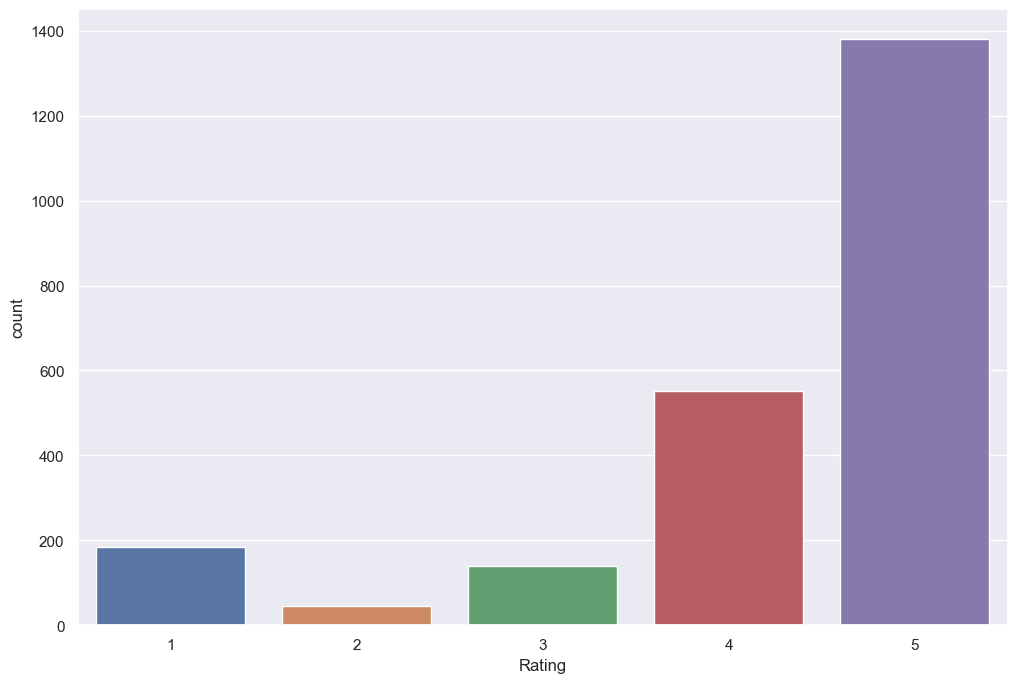

In [ ]:
sns.countplot(x = 'Rating', data = df)
plt.show()

**Пайплайн CountVectorizer + LogisticRegression**

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False)
rating = df_train.Rating

model = make_pipeline(CountVectorizer(), LogisticRegression(solver='lbfgs',
                                                            max_iter=500))
model.fit(df_train.Review, df_train.Rating)
predicted_rating = model.predict(df_test.Review)

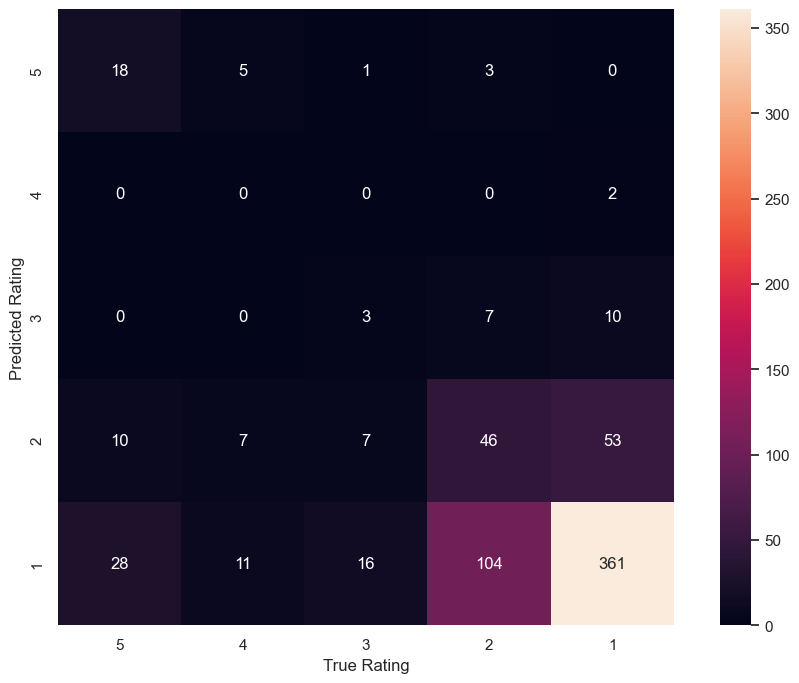

In [ ]:
mat = confusion_matrix(df_test.Rating, predicted_rating)
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
            xticklabels=pd.unique(df[['Rating']].values.ravel('K')),
            yticklabels=pd.unique(df[['Rating']].values.ravel('K')))
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [ ]:
print(classification_report(df_test.Rating, predicted_rating))

              precision    recall  f1-score   support

           1       0.67      0.32      0.43        56
           2       0.00      0.00      0.00        23
           3       0.15      0.11      0.13        27
           4       0.37      0.29      0.33       160
           5       0.69      0.85      0.76       426

    accuracy                           0.62       692
   macro avg       0.38      0.31      0.33       692
weighted avg       0.57      0.62      0.59       692



**Пайплайн TfIdf + LogisticRegression**

In [ ]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(df_train.Review, df_train.Rating)
predicted_rating = model.predict(df_test.Review)

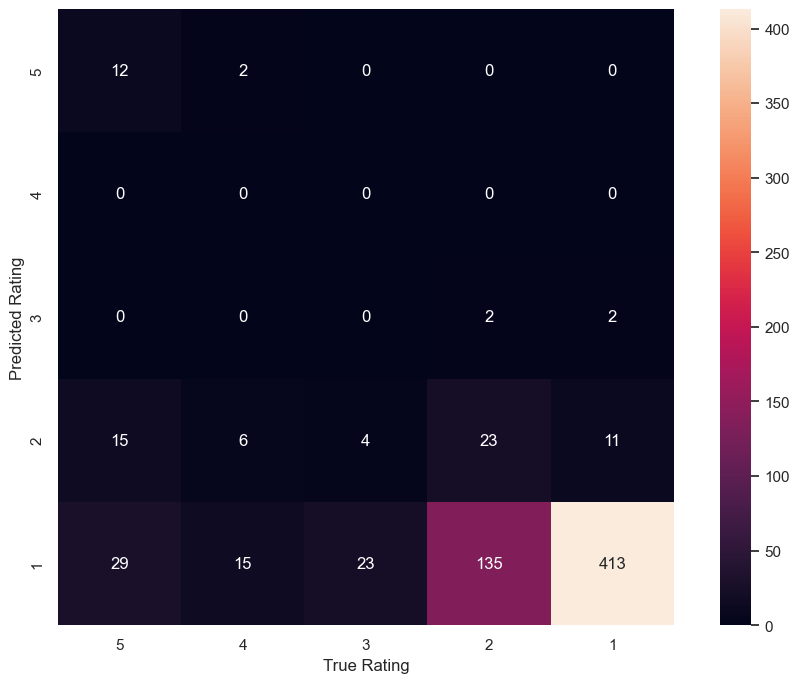

In [ ]:
mat = confusion_matrix(df_test.Rating, predicted_rating)
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
            xticklabels=pd.unique(df[['Rating']].values.ravel('K')),
            yticklabels=pd.unique(df[['Rating']].values.ravel('K')))
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [ ]:
print(classification_report(df_test.Rating, predicted_rating))

              precision    recall  f1-score   support

           1       0.86      0.21      0.34        56
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        27
           4       0.39      0.14      0.21       160
           5       0.67      0.97      0.79       426

    accuracy                           0.65       692
   macro avg       0.38      0.27      0.27       692
weighted avg       0.57      0.65      0.56       692



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

**Пайплайн CountVectorizer + MultinomialNB**

In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(df_train.Review, df_train.Rating)
predicted_rating = model.predict(df_test.Review)
print(classification_report(df_test.Rating, predicted_rating))

              precision    recall  f1-score   support

           1       0.89      0.30      0.45        56
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        27
           4       0.36      0.20      0.26       160
           5       0.68      0.93      0.78       426

    accuracy                           0.64       692
   macro avg       0.39      0.29      0.30       692
weighted avg       0.57      0.64      0.58       692



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

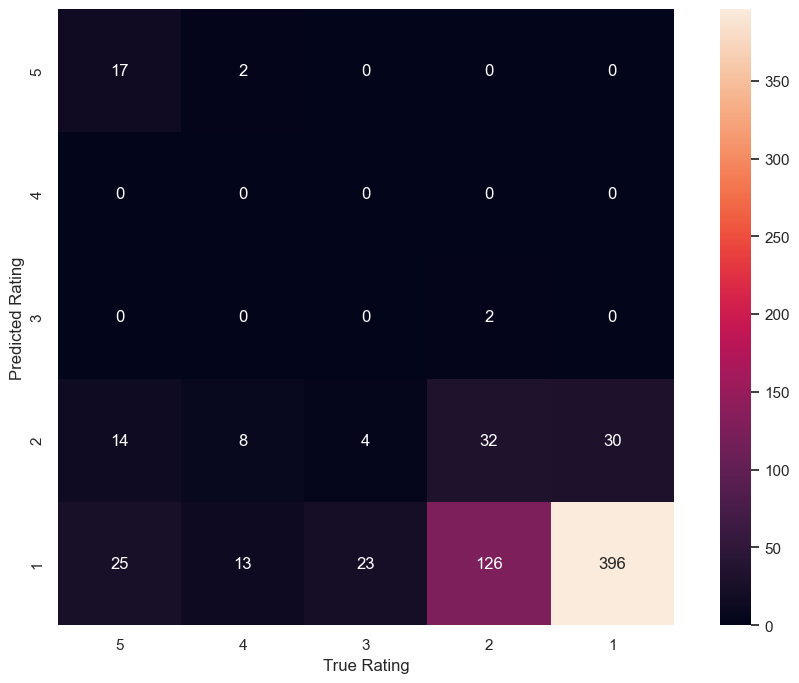

In [ ]:
mat = confusion_matrix(df_test.Rating, predicted_rating)
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
            xticklabels=pd.unique(df[['Rating']].values.ravel('K')),
            yticklabels=pd.unique(df[['Rating']].values.ravel('K')))
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.show()

**Предобработка**

In [ ]:
import spacy

import nltk
nltk.download('gutenberg') # data
nltk.download('punkt') # punkt tokenizer

[nltk_data] Downloading package gutenberg to C:\Users\HP Pavilion
[nltk_data]     Gaming\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\HP Pavilion
[nltk_data]     Gaming\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
macbeth = nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')
print(macbeth[0])
macbeth

[


['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]

In [ ]:
macbeth = nltk.corpus.gutenberg.sents('shakespeare-macbeth.txt')
print(macbeth[0])
macbeth

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']']


[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [ ]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(f'Sklearn english stopwords size: {len(ENGLISH_STOP_WORDS)}', end='\n\n')
' '.join(ENGLISH_STOP_WORDS)

Sklearn english stopwords size: 318



'when thereafter put somehow afterwards either same their against back amoungst toward upon was fifty seems well under do they whatever these one us again the show find those serious about bill thereupon across before mostly two nowhere from almost un please inc much wherever beside hereupon sixty therefore thin latterly you always however thus into ourselves up whereupon own not then your am ie throughout eleven what alone within hereby amount for sometimes sometime without full whether seem first via re meanwhile as how namely me nor more thereby fifteen here have call very both hers that already its rather etc had less than indeed top until if co any latter all were nobody along detail in even may nine interest get myself another is hasnt cannot seemed above many forty anyhow something yours ever move several must further no she everyone but yet will ten everywhere besides de during although whereafter should anyone enough amongst been whose could noone whence being or anyway keep w

In [ ]:
!pip install clean-text

In [ ]:
from cleantext import clean

In [ ]:
df['Review'].iloc[3]

'My wife is so happy and best product 👌🏻😘'

In [ ]:
clean(df.Review, no_emoji=True)

'0 best under 60k great performancei got it for a...\n1 good perfomence...\n2 great performance but usually it has also that...\n3 my wife is so happy and best product\n4 light weight laptop with new amazing features,...\n...\n2299 great display, accurate colours at this price ...\n2300 superb monitor first brought 1 used for 2 mont...\n2301 awesome\n2302 only one issue with adapter\n2303 worth the money u spend for this monitor great...\nname: review, length: 2304, dtype: object'

In [ ]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').
                          str.decode('ascii'))

In [ ]:
df['Cleaned_text'] = df['Review'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp(x) if
        not token.is_stop
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
    )
)
df.sample(5)

,Rating,Review,Cleaned_text
1058,1,Worst phone. Damn damn heavy and camera quali...,bad phone damn damn heavy camera quality bad
1454,5,I gifted this phone for my mother & She liked ...,gift phone mother like slim light weight handy...
598,5,Loved the delivery by EKart...the delivery guy...,love delivery ekart delivery guy cooperative p...
735,1,Read carefully if you want table top installat...,read carefully want table installation help gi...
749,5,"I have researched a lot before buying this TV,...",research lot buy tv spend week browse lot watc...


In [ ]:
df['Cleaned_text'].iloc[3]

'wife happy good product'

##### Train/test split & fit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_text'], df['Rating'], random_state=2023)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
vectorizer = CountVectorizer(max_df=0.7, min_df=0.003)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_vectorized

<1728x736 sparse matrix of type '<class 'numpy.int64'>'
	with 21976 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['1080p', '108mp', '11i', '120hz', '120w', '13mp', '16mp', '30',
       '3d', '4k', '50mp', '5battery', '5value', '67w', '75hz', '8i',
       '8mp', '90hz', '9i', 'able', 'absolutely', 'accord', 'actually',
       'ad', 'add', 'adjust', 'affordable', 'afterall', 'ago', 'ai',
       'amazing', 'amole', 'amoled', 'and', 'android', 'angle', 'apart',
       'app', 'application', 'area', 'aspect', 'assistant', 'atleast',
       'atmos', 'attractive', 'audio', 'auto', 'automatic', 'available',
       'average', 'avoid', 'awesome', 'backlight', 'backup', 'bad',
       'band', 'bank', 'base', 'basic', 'bass', 'battery', 'beast',
       'beautiful', 'becoz', 'believe', 'best', 'better', 'bezel', 'big',
       'bit', 'black', 'blow', 'blue', 'bluetooth', 'body', 'boost',
       'boot', 'bottle', 'box', 'boy', 'brand', 'bright', 'brightness',
       'brilliant', 'bring', 'bt', 'budget', 'bug', 'build', 'but', 'buy',
       'cable', 'call', 'camera', 'camo', 'capacity', 'capture', 'card',
  

In [ ]:
pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.
             get_feature_names_out()).head()

,1080p,108mp,11i,120hz,120w,13mp,16mp,30,3d,4k,...,wow,write,xiaomi,yah,year,yes,you,youtube,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Бейзлайн

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(
    X_train_vectorized, y_train)
preds = dummy_clf.predict(X_test_vectorized)
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00       142
           5       0.60      1.00      0.75       344

    accuracy                           0.60       576
   macro avg       0.12      0.20      0.15       576
weighted avg       0.36      0.60      0.45       576



#### Логистическая регрессия

In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.82      0.70      0.76        47
           2       0.86      0.50      0.63        12
           3       0.76      0.42      0.54        31
           4       0.68      0.44      0.53       142
           5       0.74      0.91      0.82       344

    accuracy                           0.74       576
   macro avg       0.77      0.59      0.66       576
weighted avg       0.74      0.74      0.72       576



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Переопределение токенизатора, препроцессинга

In [ ]:
import re

In [ ]:
def custom_tokenize(text):
  text = re.sub(r'[^a-zA-Z ]', '', text)
  return text.split()

In [ ]:
custom_vectorizer = CountVectorizer(
    max_df=0.7,
    min_df=0.003,
    tokenizer=custom_tokenize, # аналогично можно переопределить preprocessor
)
X_train_vectorized = custom_vectorizer.fit_transform(X_train)
X_test_vectorized = custom_vectorizer.transform(X_test)

C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_vectorized

<1728x728 sparse matrix of type '<class 'numpy.int64'>'
	with 22206 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_vectorized.toarray(),
             columns=custom_vectorizer.get_feature_names_out()).head()

,a,able,absolutely,accord,actually,ad,add,adjust,affordable,afterall,...,wow,write,x,xiaomi,yah,year,yes,youtube,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.80      0.68      0.74        47
           2       0.67      0.50      0.57        12
           3       0.76      0.42      0.54        31
           4       0.71      0.46      0.56       142
           5       0.75      0.91      0.82       344

    accuracy                           0.75       576
   macro avg       0.74      0.59      0.65       576
weighted avg       0.74      0.75      0.73       576



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Оптимизация гиперпараметров пайплайна целиком - HalvingGridSearchCV

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
parameter_grid = {
    "counter__max_df": np.linspace(0.5, 0.9, 10),
    "counter__min_df": [0.001, 0.003, 0.005],
    "counter__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "tfidf__norm": ("l1", "l2"),
    "clf__C": np.linspace(0.1, 1, 10),
}

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=2023,
    error_score='raise'
)
grid_search.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 7
n_possible_iterations: 4
min_resources_: 50
max_resources_: 1728
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1200
n_resources: 50
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
----------
iter: 1
n_candidates: 400
n_resources: 150
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 2
n_candidates: 134
n_resources: 450
Fitting 5 folds for each of 134 candidates, totalling 670 fits
----------
iter: 3
n_candidates: 45
n_resources: 1350
Fitting 5 folds for each of 45 candidates, totalling 225 fits
CPU times: total: 15.4 s
Wall time: 1min 23s


HalvingGridSearchCV(error_score='raise',
                    estimator=Pipeline(steps=[('counter', CountVectorizer()),
                                              ('tfidf', TfidfTransformer()),
                                              ('clf', LogisticRegression())]),
                    n_jobs=-1,
                    param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                'counter__max_df': array([0.5       , 0.54444444, 0.58888889, 0.63333333, 0.67777778,
       0.72222222, 0.76666667, 0.81111111, 0.85555556, 0.9       ]),
                                'counter__min_df': [0.001, 0.003, 0.005],
                                'counter__ngram_range': ((1, 1), (1, 2)),
                                'tfidf__norm': ('l1', 'l2')},
                    random_state=2023, scoring='accuracy', verbose=1)

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

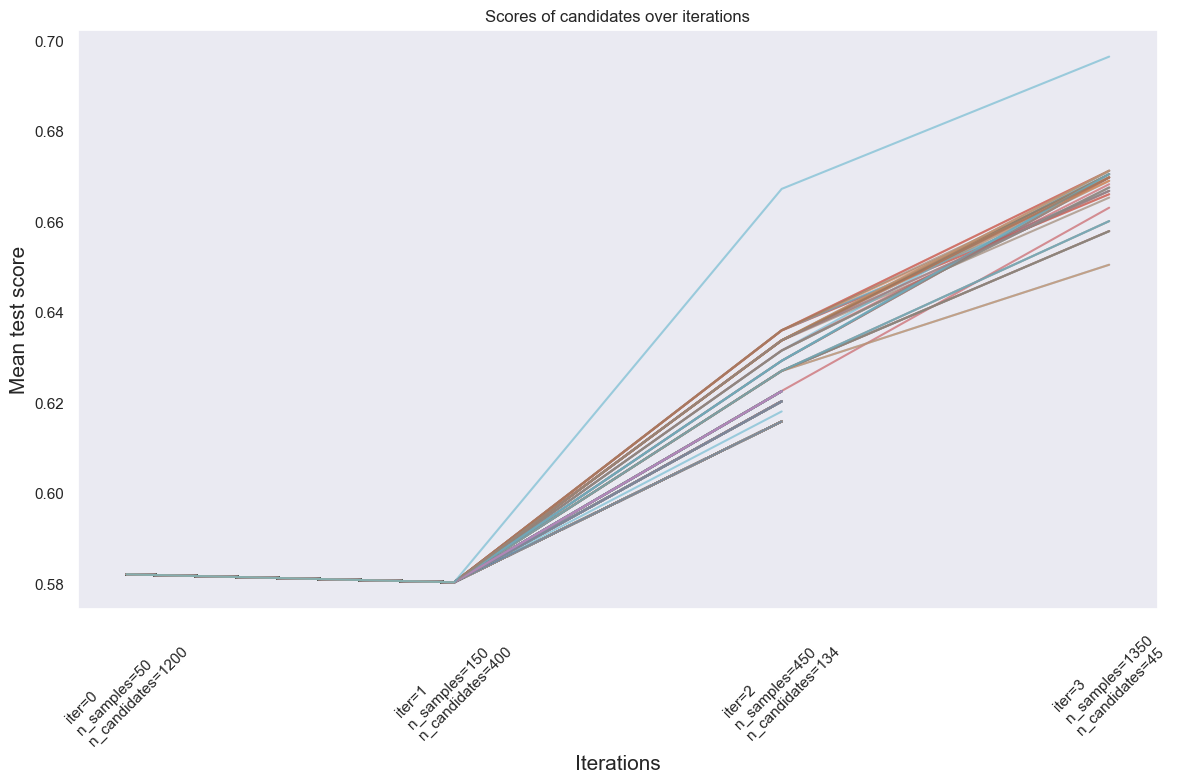

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter",
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={grid_search.n_resources_[i]}\nn_candidates={grid_search.n_candidates_[i]}"
    for i in range(grid_search.n_iterations_)
]

ax.set_xticks(range(grid_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
grid_search.best_score_

0.6965881866997108

In [ ]:
preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.84      0.55      0.67        47
           2       0.00      0.00      0.00        12
           3       0.75      0.29      0.42        31
           4       0.74      0.35      0.48       142
           5       0.71      0.96      0.82       344

    accuracy                           0.72       576
   macro avg       0.61      0.43      0.48       576
weighted avg       0.71      0.72      0.68       576



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

#### Визуализация & Интерпретация

In [ ]:
import eli5

In [ ]:
grid_search.best_estimator_['clf']

LogisticRegression()

In [ ]:
eli5.show_weights(
    estimator=grid_search.best_estimator_['clf'],
    feature_names=list(grid_search.best_estimator_['counter'].
                       get_feature_names_out()),
    top=(50, 5)
)

**Пайплайн CountVectorizer + LogisticRegression**

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False)
rating = df_train.Rating

model = make_pipeline(CountVectorizer(), LogisticRegression(solver='lbfgs',
                                                            max_iter=500))
model.fit(df_train.Review, df_train.Rating)
predicted_rating = model.predict(df_test.Review)

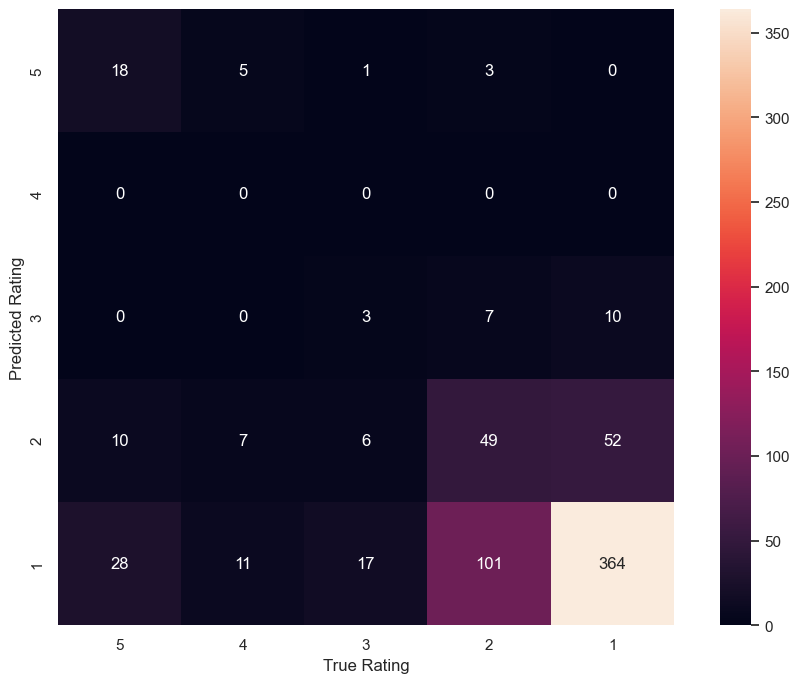

In [ ]:
mat = confusion_matrix(df_test.Rating, predicted_rating)
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
            xticklabels=pd.unique(df[['Rating']].values.ravel('K')),
            yticklabels=pd.unique(df[['Rating']].values.ravel('K')))
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [ ]:
print(classification_report(df_test.Rating, predicted_rating))

              precision    recall  f1-score   support

           1       0.67      0.32      0.43        56
           2       0.00      0.00      0.00        23
           3       0.15      0.11      0.13        27
           4       0.40      0.31      0.35       160
           5       0.70      0.85      0.77       426

    accuracy                           0.63       692
   macro avg       0.38      0.32      0.34       692
weighted avg       0.58      0.63      0.59       692



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

**Пайплайн TfIdf + LogisticRegression**

In [ ]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(df_train.Review, df_train.Rating)
predicted_rating = model.predict(df_test.Review)

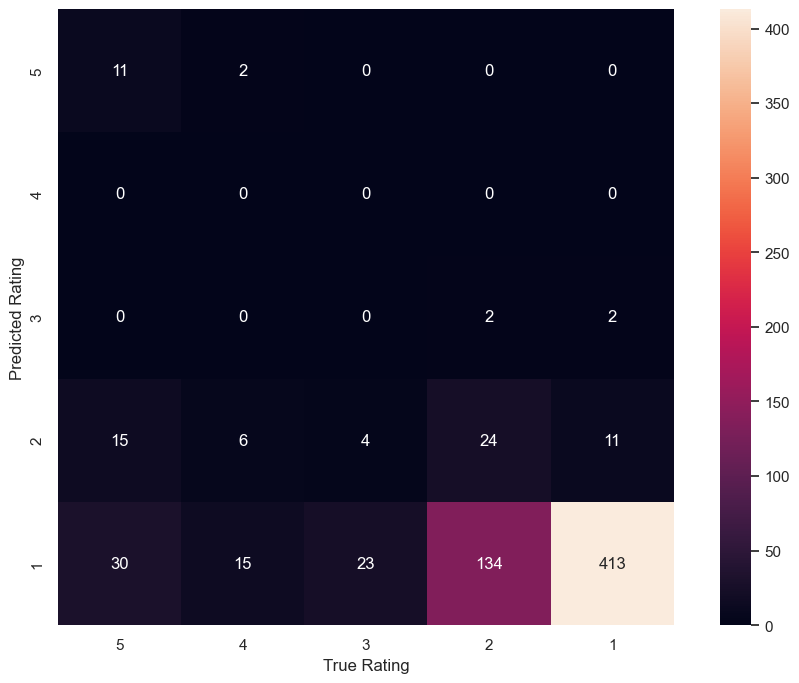

In [ ]:
mat = confusion_matrix(df_test.Rating, predicted_rating)
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
            xticklabels=pd.unique(df[['Rating']].values.ravel('K')),
            yticklabels=pd.unique(df[['Rating']].values.ravel('K')))
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [ ]:
print(classification_report(df_test.Rating, predicted_rating))

              precision    recall  f1-score   support

           1       0.85      0.20      0.32        56
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        27
           4       0.40      0.15      0.22       160
           5       0.67      0.97      0.79       426

    accuracy                           0.65       692
   macro avg       0.38      0.26      0.27       692
weighted avg       0.57      0.65      0.56       692



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

**Пайплайн CountVectorizer + MultinomialNB**

In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(df_train.Review, df_train.Rating)
predicted_rating = model.predict(df_test.Review)
print(classification_report(df_test.Rating, predicted_rating))

              precision    recall  f1-score   support

           1       0.89      0.30      0.45        56
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        27
           4       0.36      0.20      0.26       160
           5       0.68      0.93      0.78       426

    accuracy                           0.64       692
   macro avg       0.39      0.29      0.30       692
weighted avg       0.57      0.64      0.58       692



C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

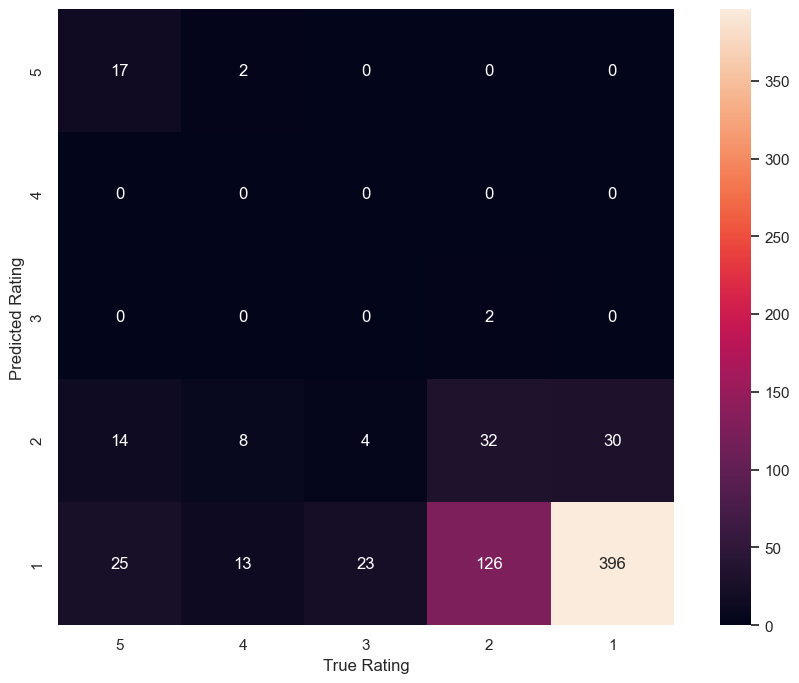

In [ ]:
mat = confusion_matrix(df_test.Rating, predicted_rating)
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
            xticklabels=pd.unique(df[['Rating']].values.ravel('K')),
            yticklabels=pd.unique(df[['Rating']].values.ravel('K')))
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.show()